Latent Dirichlet Allocation - Gibbs Sampling
====

Based on the paper "Latent Dirchlet Allocation" by David M. Blei, Andrew Y. Ng, Michael I. Jordan

In [96]:
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)  
# convert tokenized documents into a document-term matrix
corpus0 = [dictionary.doc2bow(text) for text in texts]

In [97]:
import numpy as np
import numpy.linalg as la

## Parameters

document:    $m = 1,...,M$

topic asigned to word:       $z = 1,...,K$

word:        $w = 1,...,N_V$

vocabulary : $v = 1,...,V$

Z: topic assigned to word w

$\theta: K \times N$ 

$\beta: M \times K$ 

$Multinomial(\theta)$: distribution over words for a given topic

$Multinomial(\beta)$: distribution over topics for a given document

According to posterior of $\theta$ and $\beta$, their etimates only depend on the topic assignments Z. Therefore, we are able to only focus on inferring the variable Z and the other variables can be computed directly from Z.

$Z_{mw}$: the topic of word w in document m

$n_{mz}$: the number of words from document m assigned to topic z

$n_{zw}$: the number of words assigned topic z

$n_{z}$: the total number of words assigned to topic z

$n_{m}$: the total number of words in document m


In [158]:
text2 = [['1','2','3','1','3','2','4','5','4','3','1','4','3','5'],['1','1','3','2','3','5','4','3','4','4','5','4'],['1','3','5','4','3','2','2','3','5','4'],['6','6','7','6','8','9','9','7','7','10','9'],['6','8','9','9','7','6','6','8','9','10','10'],['6','6','6','7','8','9','9','9','7','10','10','10','7','8'],['11','11','11','11','12','12','13','13','13','14','15','15','15'],['11','12','12','13','13','13','14','14','14','14','15','15'],['16','16','16','17','17','18','18','19','20','20'],
['16','17','16','17','17','18','19','19','16','20'],['16','16','16','17','17','19','18','19','17','20']]

In [164]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(text2)  
# convert tokenized documents into a document-term matrix
corpus2 = [dictionary.doc2bow(text) for text in text2]

In [165]:
corpus2

[[(0, 3), (1, 2), (2, 2), (3, 3), (4, 4)],
 [(0, 4), (1, 2), (2, 1), (3, 2), (4, 3)],
 [(0, 2), (1, 2), (2, 2), (3, 1), (4, 3)],
 [(5, 1), (6, 1), (7, 3), (8, 3), (9, 3)],
 [(5, 2), (6, 2), (7, 3), (8, 1), (9, 3)],
 [(5, 3), (6, 2), (7, 3), (8, 3), (9, 3)],
 [(10, 4), (11, 3), (12, 3), (13, 2), (14, 1)],
 [(10, 1), (11, 3), (12, 2), (13, 2), (14, 4)],
 [(15, 2), (16, 3), (17, 2), (18, 1), (19, 2)],
 [(15, 3), (16, 3), (17, 1), (18, 2), (19, 1)],
 [(15, 3), (16, 3), (17, 1), (18, 2), (19, 1)]]

In [133]:
corpus1 = [[(0,1),(1,2),(2,3),(3,1),(4,2),(5,2)],[(0,2),(2,1),(3,2),(5,3)],[(6,2),(7,1),(8,3),(9,1),(10,2)],[(7,3),(8,1), (9,1)],[(0,3),(1,1),(3,1),(4,2),(5,2)],[(6,1),(7,2),(9,1),(10,2),(11,1)]]

In [155]:
corpus1

[[(0, 1), (1, 2), (2, 3), (3, 1), (4, 2), (5, 2)],
 [(0, 2), (2, 1), (3, 2), (5, 3)],
 [(6, 2), (7, 1), (8, 3), (9, 1), (10, 2)],
 [(7, 3), (8, 1), (9, 1)],
 [(0, 3), (1, 1), (3, 1), (4, 2), (5, 2)],
 [(6, 1), (7, 2), (9, 1), (10, 2), (11, 1)]]

In [98]:
def words_count_doc(corpus):
    """
    Count the toal number of words in each document in corpus.

    Parameters
    ----------
    corpus : a list-like, contains bag-of-words of each document

    Returns
    -------
    n_m : a np.array, shape(M)
         the total number of words in each document
    """
    n_m = []
    for i in range(len(corpus)):
        n_m.append(np.sum(corpus[i], axis = 0)[1])
    return np.array(n_m)


In [99]:
def empty_parameters(corpus, K, V):
    """
    Initialize empty parameter n_mz, n_zw, n_z.

    Parameters:
    -----------
    K : int, the number of topics
    V : int, the number of vocabulary
    
    Returns:
    --------
    z_mw : the topic of word w in document m
    n_mz : the number of words from document m assigned to topic z
    n_zw : the number of words assigned topic z
    n_z : the total number of words assigned to topic z
    """
    z_mw = []
    n_mz = np.zeros((len(corpus), K))
    n_zw = np.zeros((K, V))
    n_z = np.zeros(K)
    return z_mw, n_mz, n_zw, n_z

In [100]:
def initial_parameters(corpus, K, V):
    """
    Initialize parameters for the corpus 

    Parameters:
    -----------
    corpus: a list-like, contains bag-of-words of each document
    K : int, the number of topics
    V : int, the number of vocabulary

    Returns:
    --------
    z_mw : the topic of word w in document m
    n_mz : the number of words from document m assigned to topic z
    n_zw : the number of words assigned topic z
    n_z : the total number of words assigned to topic z
    
    """
    z_mw, n_mz, n_zw, n_z = empty_parameters(corpus, K, V)
    z_mw = []
    for m, doc in enumerate(corpus):
        z_n = []
        for n, t in doc:
            z = np.random.randint(0, K)
            z_n.append(z)
            n_mz[m, z] += t
            n_zw[z, n] += t
            n_z[z] += t
        z_mw.append(np.array(z_n))
    return z_mw, n_mz, n_zw, n_z

In [101]:
def sample_topic(K, n_zw, n_z, n_mz, n_m, alpha, phi, w, m):
    """
    Sample new topic for current word
    
    """
    p_z = np.zeros(K)
    for j in range(K):
        p_z[j] = ((n_zw[j, w] + phi)/(n_z[j] + V * phi)) * ((n_mz[m, j] + alpha)/(n_m[m] + K * alpha))
    new_z = np.random.multinomial(1, p_z/p_z.sum()).argmax()
    return new_z    

In [105]:
def update_beta(V, n_zw, n_z, alpha):
    """
    Update beta
    """
    beta = (n_zw + alpha)/(n_z[:,None] + V *alpha)
    return beta

In [106]:
def update_theta(K, n_mz, n_m, phi):
    """
    Update theta
    """
    theta = (n_mz + phi)/(n_m[:, None] + K * phi)
    return theta

In [112]:
def gibbs_sampling(corpus, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi):
    beta_gibbs = []
    theta_gibbs = []
    
    for i in range(max_iter):
        if i%1000 == 0:
            print(i)
        for m, doc in enumerate(corpus):
            for n, (w, t) in enumerate(doc):
                #exclude the current word
                z = z_mw[m][n]
                n_mz[m, z] -= t
                n_m[m] -= t
                n_zw[z, w] -= t
                n_z[z] -= t
        
                new_z = sample_topic(K, n_zw, n_z, n_mz, n_m, alpha, phi, w, m)

                #include the current word
                z_mw[m][n] = new_z
                n_mz[m, new_z] += t
                n_zw[new_z, w] += t
                n_z[new_z] += t
                n_m[m] += t

        #update beta
        beta_gibbs.append(update_beta(V, n_zw, n_z, alpha))
        #update theta
        theta_gibbs.append(update_theta(K, n_mz, n_m, phi))
    return beta_gibbs, theta_gibbs

In [148]:
#corpus : corpus contains bag-of-words
#K : number of topics
#V : vocaburary size

K = 2
V = 12
alpha = 0.5
phi = 0.5
max_iter = 10000

#intialize parameters
n_m = words_count_doc(corpus1)
z_mw, n_mz, n_zw, n_z = initial_parameters(corpus1, K, V)

In [149]:
%time beta0, theta0 = gibbs_sampling(corpus1, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 6.61 s, sys: 63.6 ms, total: 6.67 s
Wall time: 6.71 s


In [150]:
beta0[2]

array([[ 0.01851852,  0.01851852,  0.01851852,  0.01851852,  0.01851852,
         0.01851852,  0.12962963,  0.24074074,  0.16666667,  0.12962963,
         0.16666667,  0.05555556],
       [ 0.19117647,  0.10294118,  0.13235294,  0.13235294,  0.13235294,
         0.22058824,  0.01470588,  0.01470588,  0.01470588,  0.01470588,
         0.01470588,  0.01470588]])

In [168]:
beta_est = sum(beta0[5000:9999])/5000

In [169]:
beta_est

array([[ 0.11433015,  0.06477446,  0.08153653,  0.08111095,  0.0814577 ,
         0.13014172,  0.06595815,  0.11585587,  0.08287968,  0.06617818,
         0.08265484,  0.03292179],
       [ 0.09656202,  0.05752013,  0.07014725,  0.07092975,  0.07028896,
         0.11060199,  0.07747785,  0.1377031 ,  0.09665789,  0.077561  ,
         0.0975883 ,  0.03676176]])

In [172]:
#corpus : corpus contains bag-of-words
#K : number of topics
#V : vocaburary size

K = 4
V = 20
alpha = 0.5
phi = 0.5
max_iter = 10000

#intialize parameters
n_m = words_count_doc(corpus2)
z_mw, n_mz, n_zw, n_z = initial_parameters(corpus2, K, V)

In [173]:
%time beta2, theta2 = gibbs_sampling(corpus2, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 17.5 s, sys: 182 ms, total: 17.7 s
Wall time: 18.7 s


In [174]:
beta_est = sum(beta2[5000:9999])/5000

In [175]:
beta_est

array([[ 0.0167429 ,  0.01596291,  0.01614828,  0.01595214,  0.01591043,
         0.01614524,  0.01594314,  0.01572106,  0.01627439,  0.01602139,
         0.15047042,  0.18086357,  0.1523293 ,  0.12460644,  0.15037696,
         0.01623181,  0.01617893,  0.0160026 ,  0.01612492,  0.01579318],
       [ 0.20249776,  0.13846246,  0.11650972,  0.13848274,  0.22499596,
         0.01191536,  0.01165552,  0.01175366,  0.01193446,  0.01174717,
         0.01231753,  0.01199226,  0.01192311,  0.01181143,  0.01225954,
         0.01194883,  0.01203561,  0.0118042 ,  0.01203854,  0.01171415],
       [ 0.01201192,  0.01184487,  0.01179701,  0.01165648,  0.01203046,
         0.13791357,  0.11674774,  0.20342614,  0.15943257,  0.20372236,
         0.01214242,  0.01194985,  0.01181578,  0.01174657,  0.01234335,
         0.01184906,  0.01178192,  0.0117933 ,  0.01194615,  0.01184848],
       [ 0.01372001,  0.01343835,  0.01348097,  0.01361525,  0.01370252,
         0.01371529,  0.01366437,  0.01413983,  

### Randomly generated test data

In [11]:
#Intialize parameters
#M: number of documents
M = 200
#k: topic
k = 10
#N: length of each document
np.random.seed(seed=123)
N = np.random.randint(150,200,size=M)
#V: number of words
V = 30

In [12]:
alpha_gen = np.array((1,1,10,1,1,7,1,20,1,1))
beta_gen = np.random.dirichlet(0.1*np.ones(V),k).T

w_struct = list();

for m in range(M):
    theta = np.random.dirichlet(alpha_gen,1)[0]
    doc = np.array([])
    
    for n in range(N[m]):
        z_n = np.random.choice(np.arange(k),p=theta)
        w_n = np.random.choice(np.arange(V),p=beta_gen[:,z_n])
        w_n = tokenizer.tokenize(np.array_str(w_n))
        doc = np.append(doc,w_n)
    w_struct.append(doc)

In [13]:
# Arbitrarily choose topics 2,5,7 (zero-indexed) as the most likely
alpha_gen = np.array((1,1,10,1,1,20,1,15,1,1))

# Arbitrarily choose each topic to have 3 very common words
beta_probs = np.ones((V,k)) + np.array([np.arange(V)%k==i for i in range(k)]).T*19
beta_gen = np.array(list(map(lambda x: np.random.dirichlet(x),beta_probs.T))).T

w_struct = list();
theta = np.empty((M,k))

# Generate each document
for m in range(M):
    # Draw topic distribution for the document
    theta[m,:] = np.random.dirichlet(alpha_gen,1)[0]
    doc = np.array([])
    
    for n in range(N[m]):
        # Draw topic according to document's topic distribution
        z_n = np.random.choice(np.arange(k),p=theta[m,:])
        # Draw word according to topic
        w_n = np.random.choice(np.arange(V),p=beta_gen[:,z_n])
        w_n = tokenizer.tokenize(np.array_str(w_n))
        doc = np.append(doc,w_n)
    w_struct.append(doc)

In [14]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(w_struct)  
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in w_struct]

In [15]:
#corpus : corpus contains bag-of-words
#K : number of topics
#V : vocaburary size

K = k
alpha = 0.5
phi = 0.5
max_iter = 1000

#intialize parameters
n_m = words_count_doc(corpus)
z_mw, n_mz, n_zw, n_z = initial_parameters(corpus, K, V)

In [16]:
beta0, theta0 = gibbs_sampling(corpus, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
100
200
300
400
500
600
700
800
900


In [55]:
theta0[1].shape

(200, 10)

In [34]:
beta00 = []
for i in range(500):
    beta00.append(beta0[i+500][1][8])

In [45]:
beta_est = sum(beta0[500:999])/500

In [52]:
beta_est[0]

array([ 0.08769902,  0.02071854,  0.01018458,  0.04162293,  0.01481358,
        0.01752676,  0.00872979,  0.02567153,  0.02255126,  0.0687088 ,
        0.01741545,  0.00584817,  0.00978587,  0.05213506,  0.00969032,
        0.0687771 ,  0.01461826,  0.07790754,  0.01193621,  0.11878657,
        0.0144284 ,  0.00866513,  0.08774202,  0.10384394,  0.01546334,
        0.01727957,  0.01309361,  0.01159901,  0.01711635,  0.00364132])

In [92]:
beta_gen.shape

(30, 10)

In [91]:
beta_gen[1]

array([ 0.02667266,  0.193501  ,  0.02076126,  0.03307788,  0.01127235,
        0.00950338,  0.01646275,  0.01653503,  0.01804142,  0.00957833])

In [93]:
sum(beta_gen[1])

0.35540605660910729

In [94]:
beta_est[1]

array([ 0.09039766,  0.02074671,  0.01094098,  0.03876645,  0.0143038 ,
        0.01756742,  0.00860172,  0.02863733,  0.02099434,  0.06740826,
        0.01698142,  0.00583018,  0.00998598,  0.04950241,  0.01046007,
        0.06240036,  0.01440211,  0.07463499,  0.01192963,  0.12174144,
        0.01503136,  0.01050897,  0.08457713,  0.10600502,  0.0172782 ,
        0.01797646,  0.01496117,  0.01216645,  0.01875642,  0.00450556])

In [95]:
beta_gen.T[1]

array([  7.33253222e-04,   1.93501000e-01,   1.57327799e-04,
         7.24941048e-03,   1.13729786e-02,   1.23872789e-03,
         3.87919996e-02,   2.93882927e-03,   2.38401204e-02,
         2.50613923e-03,   6.06677870e-03,   1.90499040e-01,
         4.06045120e-02,   4.04681833e-02,   8.38443139e-03,
         3.12626442e-04,   4.50988722e-03,   1.53570113e-02,
         3.63612289e-03,   3.09149077e-03,   1.84757803e-02,
         2.68780597e-01,   7.84389357e-03,   1.31484742e-02,
         7.29534258e-03,   2.16667207e-03,   9.63659405e-03,
         5.45021406e-02,   1.31604885e-02,   9.73014688e-03])

In [59]:
theta0[1].shape

(200, 10)

# Speed Up

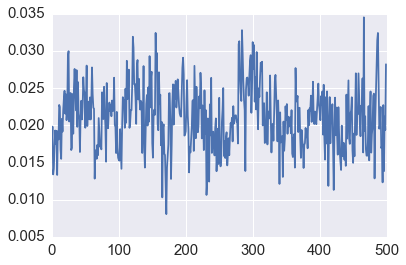

In [35]:
plt.plot(beta00)

**Utility function for timing functions**

In [93]:
import time

In [94]:
def timer(f, *args, **kwargs):
    start = time.clock()
    ans = f(*args, **kwargs)
    return ans, time.clock() - start

In [95]:
def report(fs, *args, **kwargs):
    ans, t = timer(fs[0], *args, **kwargs)
    for f in fs[1:]:
        ans_, t_ = timer(f, *args, **kwargs)
        print('%s: %.1f' % (f.__name__, t/t_))

In [96]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [199]:
n_zw

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  2.,  1.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  1.,  0.,  1.,  1.]])

In [233]:
%%cython -a

import numpy as np
import cython
@cython.boundscheck(False)
@cython.wraparound(False)

def gibbs_sampling_cy(corpus, int max_iter, int K, int V, n_zw, n_z, n_mz, n_m, z_mw, double alpha, double phi):

    cdef int i, m, n, w, t

    def sample_topic(int K, n_zw, n_z, n_mz, n_m, double alpha, double phi, int w, int m):
        """
        Sample new topic for current word

        """
        p_z = np.zeros(K)
        cdef int j
        for j in range(K):
            p_z[j] = ((n_zw[j, w] + phi)/(n_z[j] + V * phi)) * ((n_mz[m, j] + alpha)/(n_m[m] + K * alpha))
        new_z = np.random.multinomial(1, p_z/p_z.sum()).argmax()
        return new_z  

    
    def update_beta(int V, n_zw, n_z, double alpha):
        """
        Update beta
        """
        beta = (n_zw + alpha)/(n_z[:,None] + V *alpha)
        return beta

    def update_theta(int K, n_mz, n_m, double phi):
        """
        Update theta
        """
        theta = (n_mz + phi)/(n_m[:, None] + K * phi)
        return theta

    beta_gibbs = []
    theta_gibbs = []
    
    for i in range(max_iter):
        if i%100 == 0:
            print(i)
        for m, doc in enumerate(corpus):
            for n, (w, t) in enumerate(doc):
                #exclude the current word
                z = z_mw[m][n]
                n_mz[m, z] -= t
                n_m[m] -= t
                n_zw[z, w] -= t
                n_z[z] -= t
        
                new_z = sample_topic(K, n_zw, n_z, n_mz, n_m, alpha, phi, w, m)

                #include the current word
                z_mw[m][n] = new_z
                n_mz[m, new_z] += t
                n_zw[new_z, w] += t
                n_z[new_z] += t
                n_m[m] += t

        #update beta
        beta_gibbs.append(update_beta(V, n_zw, n_z, alpha))
        #update theta
        theta_gibbs.append(update_theta(K, n_mz, n_m, phi))
    return beta_gibbs, theta_gibbs


In [244]:
max_iter=1000

In [245]:
%time beta0, theta0 = gibbs_sampling(corpus0, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
100
200
300
400
500
600
700
800
900
CPU times: user 1.27 s, sys: 35.6 ms, total: 1.31 s
Wall time: 1.31 s


In [246]:
%time beta1, theta1 = gibbs_sampling_cy(corpus0, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
100
200
300
400
500
600
700
800
900
CPU times: user 1.17 s, sys: 37.9 ms, total: 1.2 s
Wall time: 1.25 s


In [237]:
max_iter=1000

In [238]:
%time beta3, theta3 = gibbs_sampling(corpus, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
100
200
300
400
500
600
700
800
900
CPU times: user 5min 24s, sys: 1.51 s, total: 5min 26s
Wall time: 5min 27s


In [239]:
%time beta4, theta4 = gibbs_sampling_cy(corpus, max_iter, K, V, n_zw, n_z, n_mz, n_m, z_mw, alpha, phi)

0
100
200
300
400
500
600
700
800
900
CPU times: user 5min 2s, sys: 2.19 s, total: 5min 4s
Wall time: 5min 10s


## lda Package

In [152]:
import lda
import numpy as np

In [153]:
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()

In [156]:
X.shape

(395, 4258)

In [157]:
X[1, ]

array([7, 0, 2, ..., 0, 0, 0], dtype=int32)